[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson2/hometask/HH-api-hometask.ipynb)

# Задание
* Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
* Извлеките все описания этих вакансий
* Создайте DataFrame  добавьте поле skills
* Переведите даты публикаций в datetime
* Постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите те вакансии с использованием python, которые вам интересны
* Определите по полю skills какие навыки больше всего востребованы для этих вакансий
* Постройте график наиболее востребованных навыков для аналитика данных

https://github.com/hhru/api

In [1]:
import requests
from tqdm.auto import tqdm
import pandas as pd

In [2]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'

In [3]:
url = f'https://api.hh.ru/vacancies'
params = {
    'employer_id':sber,
    'page':page,
    'per_page':num_per_page,
    'area':moscow,
}
res = requests.get(url, params=params)

In [5]:
res = requests.get(url)

In [7]:

vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

100

In [8]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [9]:
vacancies.get('items')[0]

{'accept_temporary': False,
 'address': None,
 'adv_response_url': 'https://api.hh.ru/vacancies/68324477/adv_response?host=hh.ru',
 'alternate_url': 'https://hh.ru/vacancy/68324477',
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=68324477',
 'archived': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'contacts': None,
 'created_at': '2022-08-01T09:34:36+0300',
 'department': None,
 'employer': {'alternate_url': 'https://hh.ru/employer/2489728',
  'id': '2489728',
  'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/3424738.jpeg',
   '90': 'https://hhcdn.ru/employer-logo/3424737.jpeg',
   'original': 'https://hhcdn.ru/employer-logo-original/745944.jpg'},
  'name': 'Банкирро',
  'trusted': True,
  'url': 'https://api.hh.ru/employers/2489728',
  'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=2489728'},
 'has_test': False,
 'id': '68324477',
 'insider_interview': None,
 'name': 'Менеджер по продажам услуг',
 'pre

In [10]:
v = vacancies.get('items')

In [13]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [14]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [15]:
vnum  = vacancies.get('pages')

In [18]:
len(all_vacancy_ids)
# https://api.hh.ru/vacancies/66634517

1150

In [17]:
vacs = []
for vac_id in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vacs.append(res.json())

  0%|          | 0/1150 [00:00<?, ?it/s]

In [19]:
res = requests.get(url)

In [20]:
res.json().keys()

dict_keys(['id', 'premium', 'billing_type', 'relations', 'name', 'insider_interview', 'response_letter_required', 'area', 'salary', 'type', 'address', 'allow_messages', 'experience', 'schedule', 'employment', 'department', 'contacts', 'description', 'branded_description', 'vacancy_constructor_template', 'key_skills', 'accept_handicapped', 'accept_kids', 'archived', 'response_url', 'specializations', 'professional_roles', 'code', 'hidden', 'quick_responses_allowed', 'driver_license_types', 'accept_incomplete_resumes', 'employer', 'published_at', 'created_at', 'initial_created_at', 'negotiations_url', 'suitable_resumes_url', 'apply_alternate_url', 'has_test', 'test', 'alternate_url', 'immediate_redirect_url', 'working_days', 'working_time_intervals', 'working_time_modes', 'accept_temporary', 'languages'])

In [21]:
res.json().get('key_skills')

[{'name': 'Проведение презентаций'},
 {'name': 'Поиск и привлечение клиентов'},
 {'name': 'Холодные продажи'},
 {'name': 'Прямые продажи'}]

In [22]:
[{'name':'SQL'},{'name':'Python'},{'name':'Git'}]

[{'name': 'SQL'}, {'name': 'Python'}, {'name': 'Git'}]

In [23]:
[x.get('name') for x in [{'name':'SQL'},{'name':'Python'},{'name':'Git'}]]

['SQL', 'Python', 'Git']

In [46]:
df = pd.json_normalize(vacs)

In [48]:
df = pd.DataFrame(vacs)

In [49]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype                                
---  ------                        --------------  -----                                
 0   id                            1150 non-null   object                               
 1   premium                       1150 non-null   bool                                 
 2   billing_type                  1150 non-null   object                               
 3   relations                     1150 non-null   object                               
 4   name                          1150 non-null   object                               
 5   insider_interview             0 non-null      object                               
 6   response_letter_required      1150 non-null   bool                                 
 7   area                          1150 non-null   object                               
 8 

In [74]:
df['key_skills']

0                                                      []
1                                                      []
2                                                      []
3       [{'name': 'Прямые продажи'}, {'name': 'Финансо...
4       [{'name': 'Git'}, {'name': 'Java'}, {'name': '...
                              ...                        
1145    [{'name': 'Проведение презентаций'}, {'name': ...
1146    [{'name': 'Холодные продажи'}, {'name': 'Поиск...
1147    [{'name': 'Активные продажи'}, {'name': 'Холод...
1148    [{'name': 'Проведение презентаций'}, {'name': ...
1149    [{'name': 'Проведение презентаций'}, {'name': ...
Name: key_skills, Length: 1150, dtype: object

In [75]:
list_of_skills = df['key_skills'].apply(lambda s: [x.get('name') for x in s]).tolist()

In [76]:
df['skills'] = list_of_skills

In [86]:
df['created_at'] = df['created_at'].dt.strftime('%m/%d/%Y')

In [87]:
df['created_at']

0       08/03/2022
1       08/03/2022
2       08/01/2022
3       08/02/2022
4       08/02/2022
           ...    
1145    08/07/2022
1146    08/07/2022
1147    08/07/2022
1148    08/07/2022
1149    08/07/2022
Name: created_at, Length: 1150, dtype: object

<BarContainer object of 1150 artists>

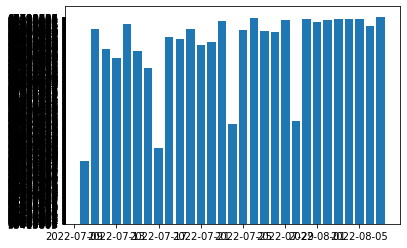

In [105]:
import matplotlib.pyplot as plt

plt.bar(df['created_at'], df['id'])

In [112]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['day_of_week'] = df['created_at'].dt.day_name()

In [116]:
from numpy.ma.core import count
c = count('Monday')

In [123]:
from collections import Counter
d = df['day_of_week'].tolist()
a = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')
b = 0
c = 0
for i in a:
  if d.count(i) > b:
    b = d.count(i)
    c = i
print(c, '-', b, 'вакансии')


# Monday

Monday - 253 вакансии
